In [1]:
# PROJECT_FOLDER = "/data/students_home/amoscatelli/Desktop/actionAnalysis"
DATASET_FOLDER = "../datasets/"
video_name_format = "S{:03d}C{:03d}P{:03d}R{:03d}A{:03d}_rgb.avi"
video_folder = "/data/datasets/NTURGBD"

In [6]:
# extracting the frames of the passed video file name in tempDataVisualizerFrames/ 
import cv2
from os.path import join #, exists,isfile, isdir
def extractFrames(setup, camera, performer, replication, action):
    tempFrameFolder = "tempDataVisualizerFrames"
    REQUESTED_FRAMES_PER_SECONDS = 30
    
#     setup, camera, performer, replication, action = parse.parse(video_name_format, file_name)
    file_name = video_name_format.format(setup,camera,performer,replication,label)
    print(file_name)
    filePath = join(video_folder,"nturgbd_rgb_s{:03d}".format(setup),"nturgb+d_rgb/",file_name)
    
    # Opens the Video file
    video = cv2.VideoCapture(filePath)

    fps = round(video.get(cv2.CAP_PROP_FPS))
    length = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    width  = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

    print("Original FPS: {}".format(int(fps)))
    print("Requested FPS: {}".format(int(REQUESTED_FRAMES_PER_SECONDS)))
    print("length: {} width: {} height: {}".format(length, width, height))
    frame_ratio_to_keep = max(round(fps/REQUESTED_FRAMES_PER_SECONDS),1)

    print("pick 1 frame every {}".format(int(frame_ratio_to_keep)))

    try:
        os.mkdir(tempFrameFolder)
    except:
        pass
    !rm $tempFrameFolder/* # cleaning temp
    
    i = -1
    while(video.isOpened()):
        i+=1
        ret, frame = video.read()
        if(i%frame_ratio_to_keep!=0):
            # print("DISCARDED")
            continue
        # print("PASSED")
        if ret == False:
            # print("FINISHED")
            break
        
        cv2.imwrite(tempFrameFolder+"/frame{:04d}.jpg".format(i),frame)

    video.release()
    cv2.destroyAllWindows()

In [3]:
import pickle

datasetName = DATASET_FOLDER+"PoseNet-101-dataset.pickle"
# datasetName = DATASET_FOLDER+"keypoint_rcnn_X_101_32x8d_FPN_3x-dataset.pickle"
with open(datasetName,'rb') as file_in:
    readFeatures, readLabels, readSetups, readCameras, readPerformers, readReplications = pickle.load(file_in)

In [27]:
from os import scandir # listdir
import matplotlib.pyplot as plt
from random import randrange

plt.rcParams["figure.figsize"] = (19,15)

# ACTION_LABEL_SET = 
# A001  - A002 - A007 - A008     - A009   - A031               - A038   -  A049
# drink - eat - throw - sit down - sit up - point to something - salute - make a fun 

label = -1
while(label != 9):
    idx = randrange(len(readFeatures))
    setup = readSetups[idx]
    camera = readCameras[idx]
    performer = readPerformers[idx]
    replication = readReplications[idx]
    label = readLabels[idx]
    features = readFeatures[idx]

print(idx,setup,camera,performer,replication,label)

# extracting the frames of the passed video file name in tempDataVisualizerFrames/ 
extractFrames(setup, camera, performer, replication, label)
    
folder = "./tempDataVisualizerFrames/"
framesInFolder = [f.path for f in scandir(folder)]
framesInFolder.sort()

for i,framePath in enumerate(framesInFolder):
    if i % 30 == 0:
        print("{}/{}".format(i,len(framesInFolder)))
    plt.axis("off")
    im = plt.imread(framePath)
    implot = plt.imshow(im)
    
    #read dataset for that picture
    if "PoseNet" in datasetName:
        x = [x[1] for x in readFeatures[idx][i]]
        y = [x[0] for x in readFeatures[idx][i]]
    else:
        x = [x[0] for x in readFeatures[idx][i]]
        y = [x[1] for x in readFeatures[idx][i]]
        
    plt.scatter(x=x, y=y, c='r', s= 40)
  
    plt.savefig(framePath, bbox_inches='tight')
    plt.close()
print("Done!")

3183 8 2 1 1 9
S008C002P001R001A009_rgb.avi
Original FPS: 30
Requested FPS: 30
length: 43 width: 1920 height: 1080
pick 1 frame every 1
0/43
30/43
Done!


In [28]:
import glob
from moviepy.editor import VideoFileClip
 
img_array = []
frames = glob.glob(folder+"/*.jpg")
frames.sort()
for filename in frames:
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
    
tempFilePath = folder+"tempVideo.mp4"
    
# out = cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
out = cv2.VideoWriter(tempFilePath,cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()


VideoFileClip(tempFilePath).ipython_display(width=500)

t:   0%|          | 0/44 [00:00<?, ?it/s, now=None]

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


# dataset overview

In [36]:
import numpy as np
# readFeatures, readLabels, readSetups, readCameras, readPerformers, readReplications 
lenght = sum([len(x)*17 for x in readFeatures])
# lenght = features.shape[0]*features.shape[1]*features.shape[2]*features.shape[3]
# print(lenght)
numberOfzeros = np.count_nonzero(readFeatures==0)
print("number of zeros: {} ({:.3f}%)".format(numberOfzeros,numberOfzeros/lenght*100))

number of zeros: 0 (0.000%)


In [34]:
numberOfZeros = 0
for features in readFeatures:
    for frameFeatures in features:
        for point in frameFeatures:
            if point[0]==0 or point[1]==1:
                    numberOfZeros +=1
print(numberOfZeros)

0


In [33]:
numberOfZeros = 0
numberOfZeros += 1
numberOfZeros

1

# AREA TEST

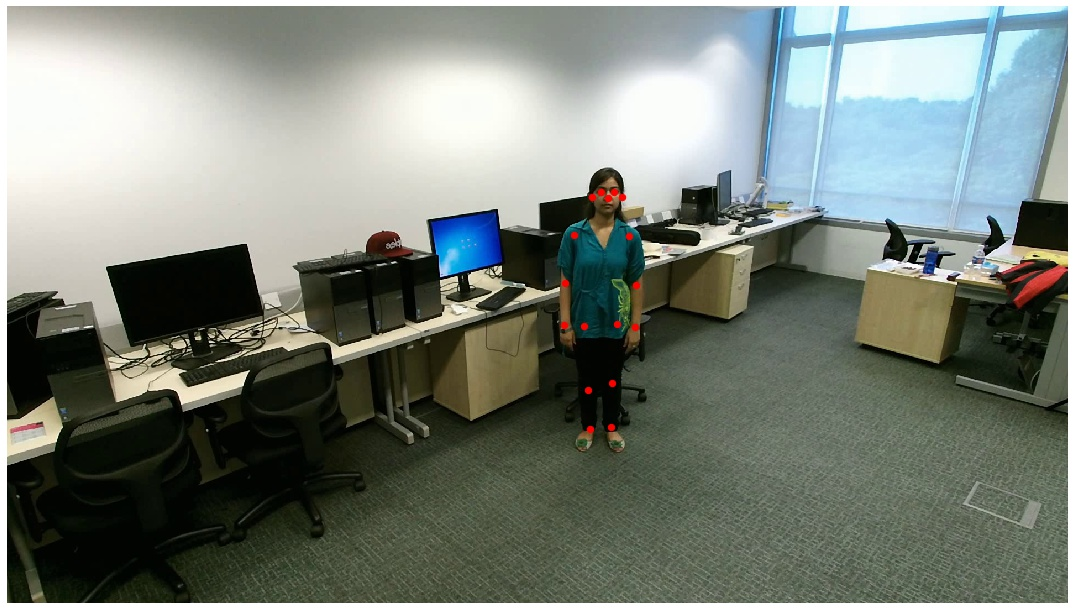

In [53]:
from IPython.display import Image
Image(framePath)

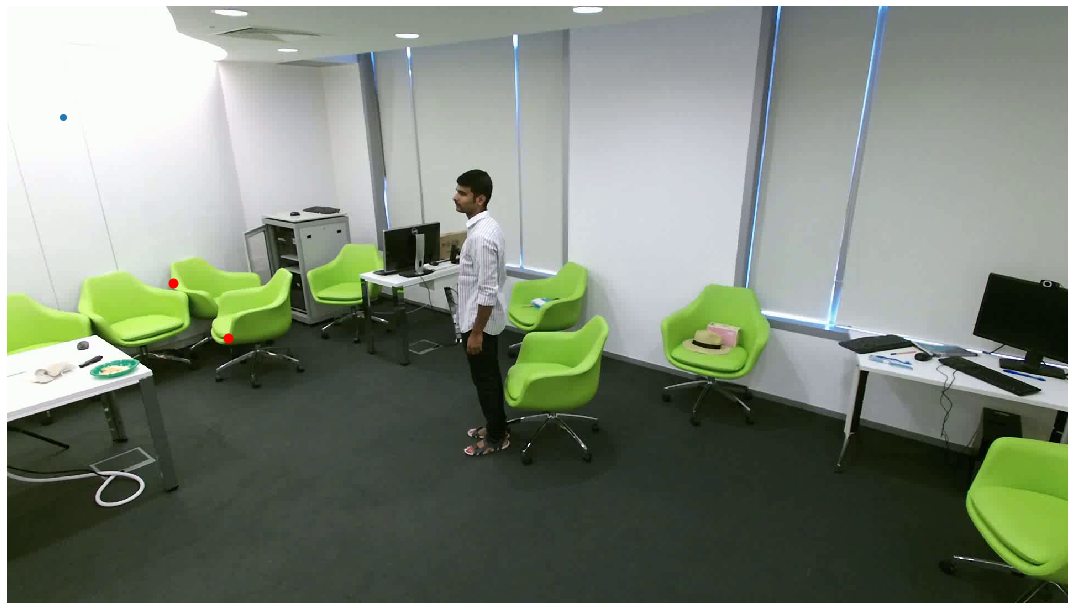

In [99]:
import matplotlib.pyplot as plt
# from matplotlib.pyplot import figure
# figure(num=None, figsize=(1080, 1920), dpi=80, facecolor='w', edgecolor='k')

plt.rcParams["figure.figsize"] = (19,15)
image_name = "temp/frame0000.jpg"
im = plt.imread(image_name)
implot = plt.imshow(im)

# put a blue dot at (10, 20)
plt.scatter([100], [200])

# put a red dot, size 40, at 2 locations:
plt.scatter(x=[300, 400], y=[500, 600], c='r', s= 80)
plt.axis("off")
plt.savefig('temp.jpg')
plt.show()

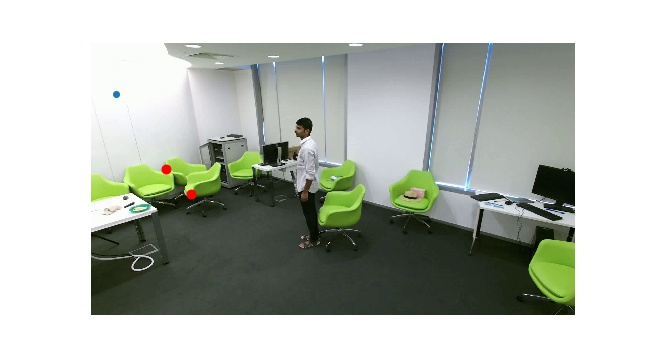

In [64]:
from IPython.display import Image
Image("temp.jpg")
# image_name = "temp.jpg"
# im = plt.imread(image_name)
# implot = plt.imshow(im)
# # figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

# # # put a blue dot at (10, 20)
# # plt.scatter([100], [200])

# # # put a red dot, size 40, at 2 locations:
# # plt.scatter(x=[300, 400], y=[500, 600], c='r', s= 80)
# # # plt.savefig('temp.png')
# # plt.savefig('temp.jpg')
# plt.axis("off")
# plt.show()

In [71]:
import cv2
import numpy as np
import glob
 
img_array = []
frames = glob.glob('temp/*.jpg')
frames.sort()
for filename in frames:
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
 
 
# out = cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
out = cv2.VideoWriter('project.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

In [72]:
from IPython.display import HTML
from base64 import b64encode
filePath = "project.mp4"

print(filePath)
from moviepy.editor import VideoFileClip

VideoFileClip(filePath).ipython_display(width=500)

project.mp4


t:   5%|▌         | 3/60 [00:00<00:01, 28.87it/s, now=None]

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [66]:
!ls temp

frame0000.jpg  frame0012.jpg  frame0024.jpg  frame0036.jpg  frame0048.jpg
frame0001.jpg  frame0013.jpg  frame0025.jpg  frame0037.jpg  frame0049.jpg
frame0002.jpg  frame0014.jpg  frame0026.jpg  frame0038.jpg  frame0050.jpg
frame0003.jpg  frame0015.jpg  frame0027.jpg  frame0039.jpg  frame0051.jpg
frame0004.jpg  frame0016.jpg  frame0028.jpg  frame0040.jpg  frame0052.jpg
frame0005.jpg  frame0017.jpg  frame0029.jpg  frame0041.jpg  frame0053.jpg
frame0006.jpg  frame0018.jpg  frame0030.jpg  frame0042.jpg  frame0054.jpg
frame0007.jpg  frame0019.jpg  frame0031.jpg  frame0043.jpg  frame0055.jpg
frame0008.jpg  frame0020.jpg  frame0032.jpg  frame0044.jpg  frame0056.jpg
frame0009.jpg  frame0021.jpg  frame0033.jpg  frame0045.jpg  frame0057.jpg
frame0010.jpg  frame0022.jpg  frame0034.jpg  frame0046.jpg  frame0058.jpg
frame0011.jpg  frame0023.jpg  frame0035.jpg  frame0047.jpg  frame0059.jpg


In [2]:
# import os
# from os import listdir, scandir
# from os.path import isfile, isdir, join #, exists
# import pickle
# import numpy as np
# import parse
# video_folder_format = "S{:3d}C{:3d}P{:3d}R{:3d}A{:3d}_rgb"

In [3]:
import os
os.environ['PATH'] = "/sbin:/bin:/usr/bin:/usr/local/bin:/snap/bin:/usr/lib/jvm/java-8-oracle/bin:/usr/lib/jvm/java-8-oracle/db/bin:/usr/lib/jvm/java-8-oracle/jre/bin:/usr/lib/jvm/java-8-oracle/bin:/usr/lib/jvm/java-8-oracle/db/bin:/usr/lib/jvm/java-8-oracle/jre/bin"
os.environ['PATH'] = PROJECT_FOLDER+"/miniconda3/bin:" + os.environ['PATH']

In [ ]:
!conda install parse

Solving environment: failed with initial frozen solve. Retrying with flexible solve.

In [4]:
!pip3 install parse

In [1]:
# from IPython.display import HTML
# from base64 import b64encode
import parse
# import os
# from os import listdir
from os.path import join #, isfile, isdir


# ACTION_LABEL_SET = ["A001","A002","A007","A008","A009","A031","A038","A049"]
# drink - eat - throw - sit down - sit up - point to something - salute - make a fun 
# file_name = "S001C001P001R001A046_rgb.avi"
file_name = "S009C003P007R002A002_rgb.avi"
print(file_name)
video_name_format = "S{:3d}C{:3d}P{:3d}R{:3d}A{:3d}_rgb.avi"
dataset_folder = "/data/datasets/NTURGBD"

setup, camera, performer, replication, action = parse.parse(video_name_format,file_name)

filePath = join(dataset_folder,"nturgbd_rgb_s{:03d}".format(setup),"nturgb+d_rgb/",file_name)

print(filePath)
from moviepy.editor import VideoFileClip

VideoFileClip(filePath).ipython_display(width=500)

S009C003P007R002A002_rgb.avi
/data/datasets/NTURGBD/nturgbd_rgb_s009/nturgb+d_rgb/S009C003P007R002A002_rgb.avi
pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


t:   1%|▏         | 3/225 [00:00<00:08, 26.03it/s, now=None]

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [4]:
from os import listdir
from os.path import isfile, isdir, join, exists

folder = "../inputData/"
filesInFolder = [f for f in listdir(folder) if isdir(join(folder, f))]


In [6]:
len(filesInFolder)

912

In [14]:
folder = "../inputData/"
len([f for f in listdir(folder) if isdir(join(folder, f))])


925